# Titanic_Dataset

Importing Required Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
tdf=pd.read_csv('titanic_train.csv')
tdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
tdf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Basic Exploration of Dataset

In [4]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tdf.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
tdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA

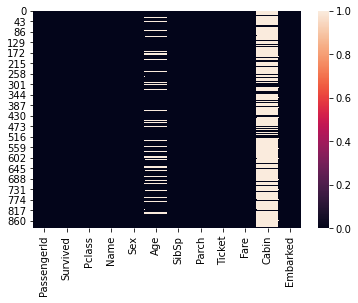

In [8]:
sns.heatmap(tdf.isnull())

In [9]:
b = pd.pivot_table(tdf, index = 'Survived', columns = ['Sex'],values = 'Pclass', aggfunc = 'count')
c = pd.pivot_table(tdf, index = 'Survived', columns = ['Embarked'],values = 'Pclass', aggfunc = 'count')
print(b)
print('\n')
print(c)

Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


From above we can come to conclusion that this dataset has 2 columns with maximum null values, age has about 20% ie 177nos & cabin around 75% of the dataset ie 687. We may need to consider to drop cabin column at a later stage as it has oo much of missing values. 

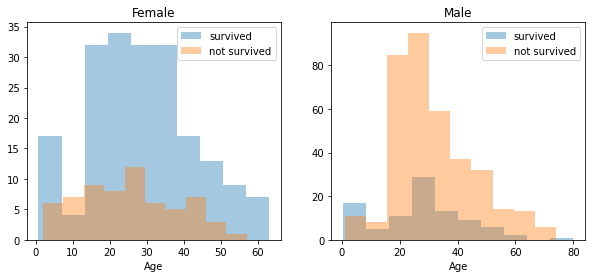

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = tdf[tdf['Sex']=='female']
men = tdf[tdf['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=10, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=10, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

From the above graph we can conclude that female betweel 18years to 45years & children below 10years had a better proportion for survival than males. Males between age of 20years to 40 years survived

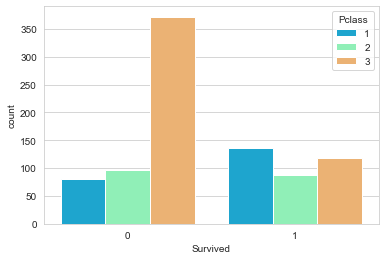

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = tdf, palette = 'rainbow')

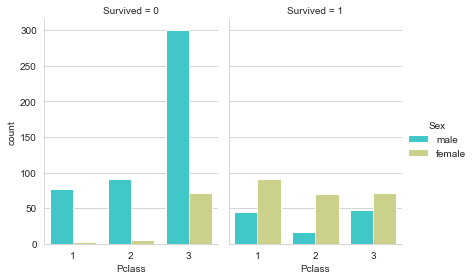

In [12]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived", data=tdf, kind="count", height=4, aspect=.7,palette = 'rainbow')

The visualizations confirm that female survival rate was more than males & that majority of people survived were from Passenger class 1

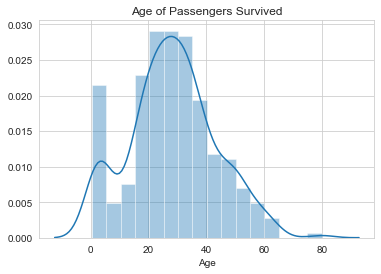

In [13]:
sns.distplot(tdf[tdf['Survived']==1]['Age'].dropna())
plt.title('Age of Passengers Survived')
plt.show()

In [14]:
tdf[tdf['Survived']==1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

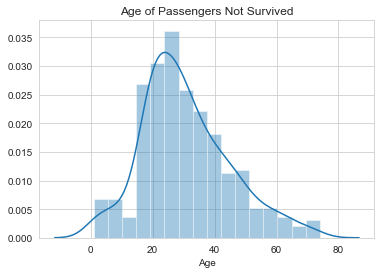

In [15]:
sns.distplot(tdf[tdf['Survived']==0]['Age'].dropna())
plt.title('Age of Passengers Not Survived')
plt.show()

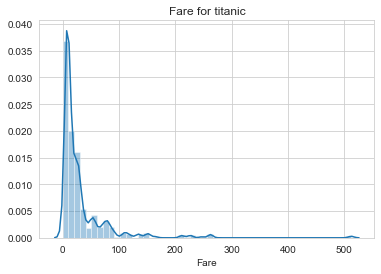

In [16]:
sns.distplot(tdf['Fare'])
plt.title('Fare for titanic')
plt.show()

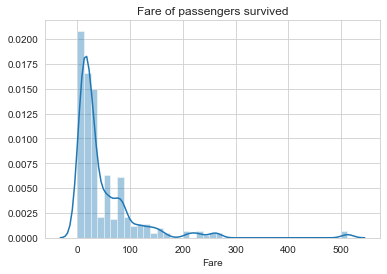

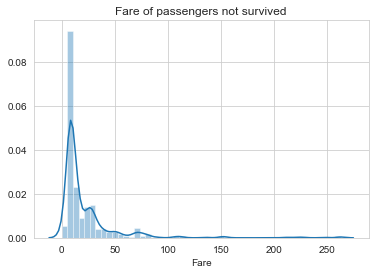

In [17]:
sns.distplot(tdf[tdf['Survived']==1]['Fare'].dropna())
plt.title('Fare of passengers survived')
plt.show()
sns.distplot(tdf[tdf['Survived']==0]['Fare'].dropna())
plt.title('Fare of passengers not survived')
plt.show()

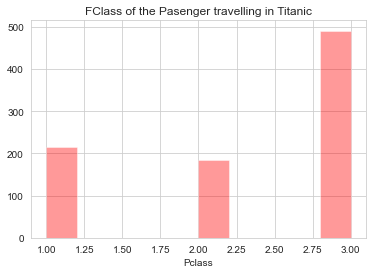

In [18]:
sns.distplot(tdf['Pclass'],color = 'Red', kde = False)
plt.title('FClass of the Pasenger travelling in Titanic')
plt.show()

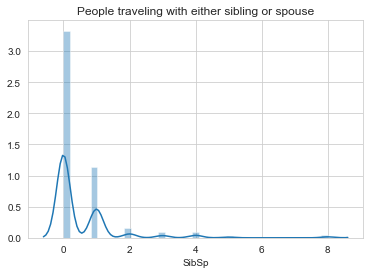

In [19]:
sns.distplot(tdf['SibSp'])
plt.title('People traveling with either sibling or spouse')
plt.show()

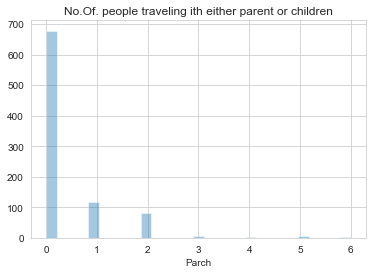

In [20]:
sns.distplot(tdf['Parch'],kde = False)
plt.title('No.Of. people traveling ith either parent or children')
plt.show()

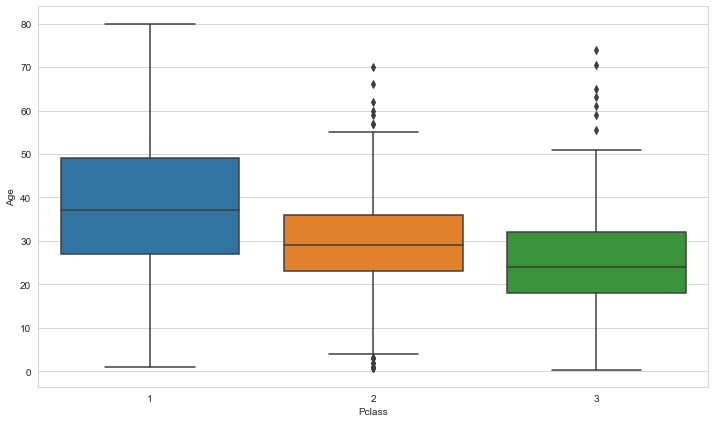

In [21]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass' , y = 'Age', data=tdf)


In [22]:
d=tdf['Pclass']
d

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [23]:
tdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [24]:
grp = tdf.groupby('Pclass').mean()

In [25]:
grp.describe

<bound method NDFrame.describe of         PassengerId  Survived        Age     SibSp     Parch       Fare
Pclass                                                                 
1        461.597222  0.629630  38.233441  0.416667  0.356481  84.154687
2        445.956522  0.472826  29.877630  0.402174  0.380435  20.662183
3        439.154786  0.242363  25.140620  0.615071  0.393075  13.675550>

The above groupby describes the mean of the age of each passenger class as mentioned below (rounding off to nearest zero) Pclass1 is around 38 
Pclass2 is around 30
Pclass3 is around 25
We will use these values to fill the missing data in the Age column.

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 25
        
    else :
        return Age

In [27]:
tdf['Age'] = tdf [['Age','Pclass']].apply(impute_age , axis = 1)

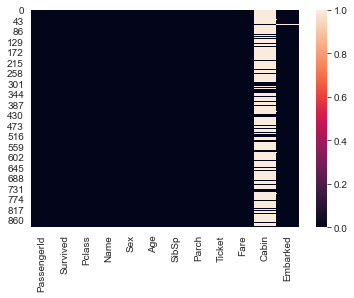

In [28]:
sns.heatmap(tdf.isnull())

In [29]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

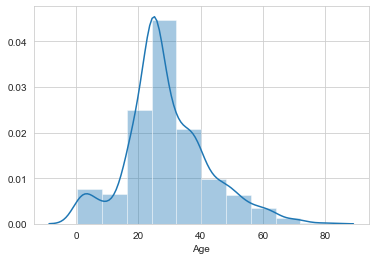

In [30]:
import matplotlib.pyplot as plt
sns.distplot(tdf['Age'], bins = 10)
plt.show()

In [31]:
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.265062,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.212184,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
a = pd.pivot_table(tdf, index =  'Survived', values = ['Pclass','Age','Fare','SibSp','Parch'],aggfunc = 'count' )
a

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,549,549,549,549,549
1,342,342,342,342,342


In [33]:
le = LabelEncoder()
tdf['Sex'] = le.fit_transform(tdf['Sex'])
tdf['Sex']



0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [34]:
tdf['Embarked'].replace(np.nan, 0)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [35]:
le = LabelEncoder()
tdf['Embarked'] = le.fit_transform(tdf['Embarked'].astype(str))
tdf['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

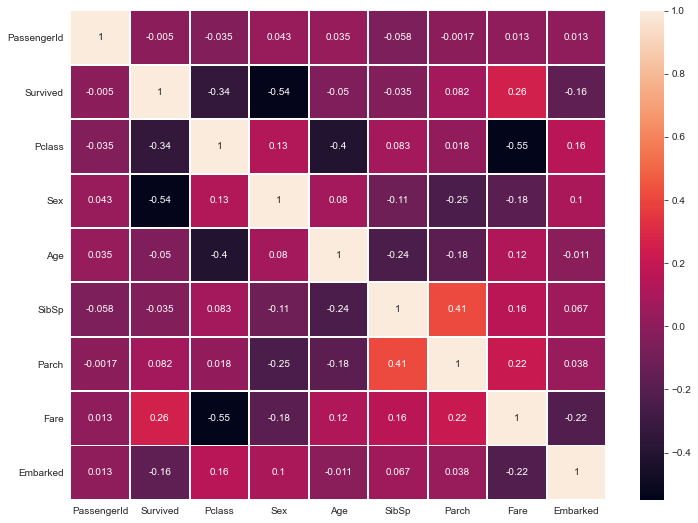

In [36]:
corr= tdf.corr()
plt.figure(figsize = (12,9))
sns.heatmap(corr,annot = True,linewidths = .8)
plt.show()

In [37]:
tdf.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.514385
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

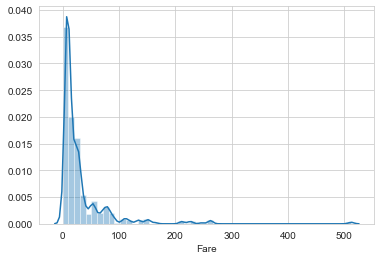

In [38]:
sns.distplot(tdf['Fare'])

In [39]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


Survived column is highly negatively correlated with Sibling/Spouse column & least likely correlated with Parent child.
Fare & Survived have a direct correlation between them.
Fare is highly skewed. Lets try to work on this skewness


In [40]:
fare_log = np.log(tdf['Fare'])
fare_log.skew()

nan

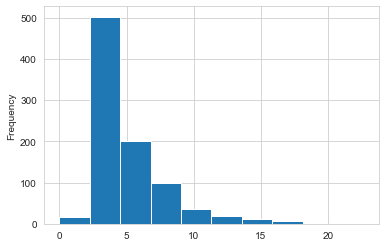

In [41]:
fare_sqrt = np.sqrt(tdf['Fare'])
fare_sqrt.skew()
fare_sqrt.plot.hist()

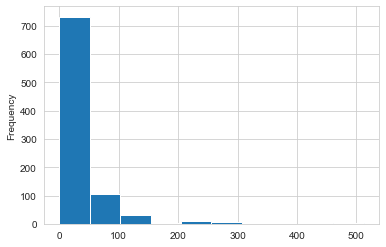

In [42]:
tdf['Fare'].plot.hist()

In [43]:
import scipy
from scipy.stats import boxcox
# 0 -> log transform
#.5 -> square root transform
tdf['Fare']=boxcox(tdf['Fare'],0)

ValueError: Data must be positive.

The skewness can be treated using sqrt method as log gives a Nan vales & boxcox is not applicable

# Prepaing the data for modeling

Passenger ID, Name, Ticket & Cabin are least relevant data for training the model hence dropping the data. Replacing the skewed column in the data set.

In [44]:
tdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [45]:
tdf['Fare'] = fare_sqrt


In [46]:
tdf['Fare'].skew()

2.08500441820235

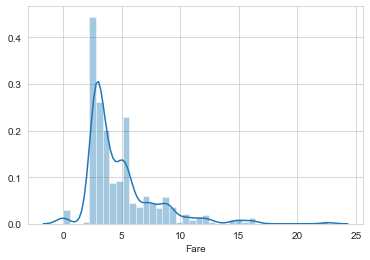

In [47]:
sns.distplot(tdf['Fare'])

In [48]:
x = tdf.drop('Survived',axis = 1,)



In [49]:
x= tdf.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)

In [50]:
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.692582,2
1,1,1,0,38.0,1,0,8.442944,0
2,1,3,0,26.0,0,0,2.815138,2
3,1,1,0,35.0,1,0,7.286975,2
4,0,3,1,35.0,0,0,2.837252,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3.605551,2
887,1,1,0,19.0,0,0,5.477226,2
888,0,3,0,25.0,1,2,4.842520,2
889,1,1,1,26.0,0,0,5.477226,0


In [51]:
y = tdf['Survived']
y.head()
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Scaling & Modeling

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = .33, random_state = 42)    

In [54]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)
lgr.score(x_train,y_train)
predlr = lgr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

1.0
[[175   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [55]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

1.0
[[175   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [56]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

1.0
[[175   0]
 [  0 120]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       175
           1       1.00      1.00      1.00       120

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [57]:
svc = SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7322033898305085
[[167   8]
 [ 71  49]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.81       175
           1       0.86      0.41      0.55       120

    accuracy                           0.73       295
   macro avg       0.78      0.68      0.68       295
weighted avg       0.77      0.73      0.70       295



# Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
lgrscores = cross_val_score(lgr , x,y, cv=10)
print(lgrscores)
print(lgrscores.mean() , lgrscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
gnbscores = cross_val_score(gnb , x,y, cv=10)
print(gnbscores)
print(gnbscores.mean() , gnbscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


In [62]:
dtscores = cross_val_score(dt,x,y,cv=10)
print(dtscores)
print(dtscores.mean() , dtscores.std())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0 0.0


In [63]:
svc_scores = cross_val_score(svc,x,y,cv=10)
print(svc_scores)
print(svc_scores.mean() , svc_scores.std())

[0.68888889 0.71910112 0.76404494 0.80898876 0.74157303 0.80898876
 0.79775281 0.85393258 0.84269663 0.80898876]
0.7834956304619226 0.050844872729863495


# Conclusion

With the above model tests we can see Logistic Regression, GaussianNB & Support Vector Classifiers all gave an accuacy score of 1.0 & cross validation score of 1.0. As eithe of the model can be used hence proceeding with GNB model

# Serialization

In [70]:
import pickle
filename ='titanic_practice.pkl'
pickle.dump(gnb,open(filename, 'wb'))

In [71]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [72]:
predicted = np.array(gnb.predict(x_test))
predicted

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [73]:
df=pd.DataFrame({'Original': a, 'Predicted': predicted}, index = range(len(a)))
df

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
290,0,0
291,0,0
292,1,1
293,0,0
